# Machine Learning Project - Random Forest Algorithm
# Predicting Bike Rental Usage based on weather and time of day

This is my first attemptat working with the random forest algorithm. I am using a dataset of bike rental usage to predict
bike rental hours depending on Temperature, Wind Speed, Rainfall, and Snowfall in South Korea.

In [1]:
#Import panda for data manipulation
import pandas as pd

#Read in csv file as "features" dataframe and display first 5 rows
features = pd.read_csv('SeoulBikeData.csv', encoding='latin1')
features.head(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [2]:
import numpy as np

#Because we want to predict the rented bike count, this will become our label array
labels=np.array(features['Rented Bike Count'])

#Remove the labels and other not needed columns from the features (axis 1 means it refers tp the column instead of index)
features = features.drop(['Date','Solar Radiation (MJ/m2)', 'Rented Bike Count', 'Humidity(%)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Seasons', 'Holiday', 'Functioning Day'], axis = 1)
features.head(5)


,Hour,Temperature(°C),Wind speed (m/s),Rainfall(mm),Snowfall (cm)
0,0,-5.2,2.2,0.0,0.0
1,1,-5.5,0.8,0.0,0.0
2,2,-6.0,1.0,0.0,0.0
3,3,-6.2,0.9,0.0,0.0
4,4,-6.0,2.3,0.0,0.0


In [3]:
print("The shape of the features are:", features.shape)

The shape of the features are: (8760, 5)


In [4]:
#Descriptive Statistics of each column
features.describe()

,Hour,Temperature(°C),Wind speed (m/s),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,11.500000,12.882922,1.724909,0.148687,0.075068
std,6.922582,11.944825,1.036300,1.128193,0.436746
min,0.000000,-17.800000,0.000000,0.000000,0.000000
25%,5.750000,3.500000,0.900000,0.000000,0.000000
50%,11.500000,13.700000,1.500000,0.000000,0.000000
75%,17.250000,22.500000,2.300000,0.000000,0.000000
max,23.000000,39.400000,7.400000,35.000000,8.800000


In [5]:
#saving feature list for future use
feature_list = list(features.columns)

#convert features to numpy array
features = np.array(features)

In [6]:
#use Skikit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

#split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42) 
print(train_features)

[[15.  16.   2.2  0.   0. ]
 [ 6.  -6.7  2.4  0.   0. ]
 [ 0.  11.3  1.2  0.   0. ]
 ...
 [14.  29.5  2.7  0.   0. ]
 [20.  -3.4  1.1  0.   0. ]
 [22.  19.3  0.5  0.   0. ]]


In [7]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (6570, 5)
Training Labels Shape: (6570,)
Testing Features Shape: (2190, 5)
Testing Labels Shape: (2190,)


In [8]:
#establish a baseline
baseline_preds = np.mean(labels)

#calculate baseline errors and display average baseline error
baseline_errors = (abs(baseline_preds - test_labels))
print("Average baseline error:", round(np.mean(baseline_errors), 2))

Average baseline error: 517.42


In [9]:
#import random forest model from sklean
from sklearn.ensemble import RandomForestRegressor

#instantiate model with 2000 decision trees
rf = RandomForestRegressor(n_estimators=1000, random_state=42)

#train model on training data
rf.fit(train_features, train_labels)


RandomForestRegressor(n_estimators=1000, random_state=42)

In [23]:
# use the trained model on the test data
predictions = rf.predict(test_features)

#Calculate errors (comparing model and test data)
errors = abs(predictions - test_labels)

#Print mean absolute error
print("Average predicted Error:", round(np.mean(errors),2))
print("Compared to average error from baseline:",round(np.mean(baseline_errors), 2)) 

Average predicted Error: 219.97
Compared to average error from baseline: 517.42


In [11]:
#Manual Testing: Hour, Temperature, Wind Speed, Rainfall, Snowfall
print(rf.predict([[15,15.2,0.5,2,0]]))

[120.503]


In [21]:
#Visualizing a single decision tree
from sklearn.tree import export_graphviz
import pydot

#Let's take the 10th tree from forest
tree = rf.estimators_[9]

#Export image to dot file
export_graphviz(tree, out_file='tree.dot', feature_names = feature_list, rounded = True, precision = 1)


In [20]:
#Dot file to graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

#write graph to png file
graph.write_pdf("RandomForestTree.pdf")

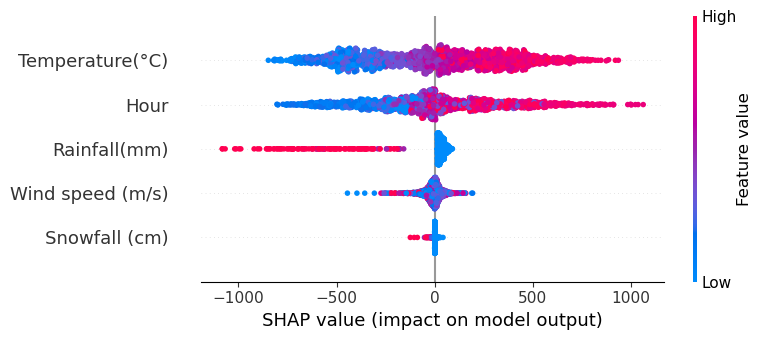

In [30]:
#add explainability to the models process
import shap
import matplotlib.pyplot as plt

#use shap explainer to see the effect of each feature
explainer = shap.TreeExplainer(rf) 

#pass test data into explainer
shap_values = explainer.shap_values(test_features)

#show the overall impoortance and effect of features
shap.summary_plot(shap_values, test_features, feature_names=feature_list)